# Lack of Robustness of the Markowitz Procedure, and the GMV

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

c:\Users\shantala.mukherjee\OneDrive - Invartis Consulting\Python\edhec_risk_kit.py:59: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("ind30_m_rets.csv",


In [2]:
l = ["Food", "Steel"]
erk.msr(0.1, er[l], cov.loc[l,l]) # this will output the weights in each of Food and Steel in the max Sharpe Ratio portfolio

array([0.67696544, 0.32303456])

Note that in the above exercise, we use the average historically realised returns over that time period as our estimates for the expected returns. Strictly speaking, we should use estimated expected returns.

In [3]:
er[l]

Food     0.115523
Steel    0.120873
dtype: float64

In [4]:
erk.msr(0.1, np.array([0.11,0.12]), cov.loc[l,l]) #inserting some estimates for expected returns

array([0.58181324, 0.41818676])

<Axes: xlabel='Volatility'>

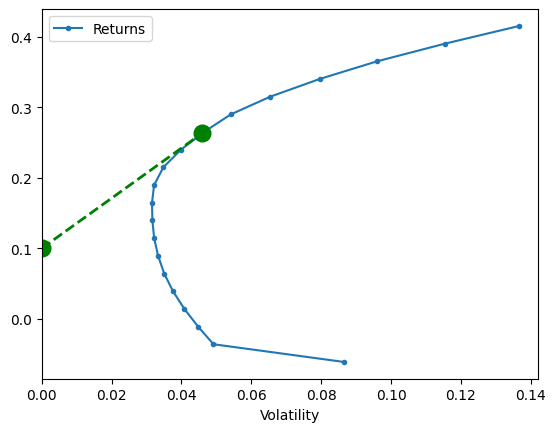

In [5]:
erk.plot_ef(20, er, cov, show_cml=True, risk_free_rate=0.1)

Naive Diversification Portfolio or Equal Weight Portfolio -- weight all N assets equally

Global Minimum Variance Portfolio -- Leftmost point on the efficient frontier curve

We will modify our plot_ef function in the erk module to show the equal weighted and GMV portfolios in the plot

<Axes: xlabel='Volatility'>

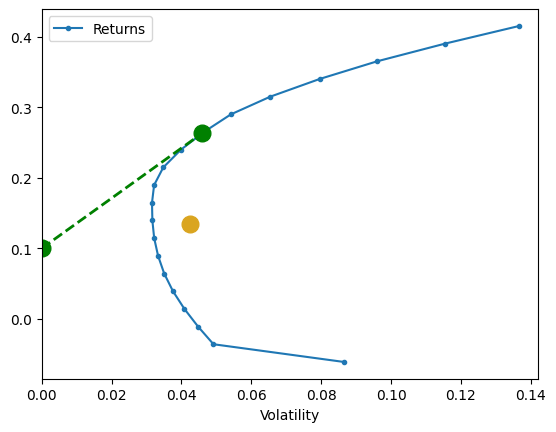

In [7]:
erk.plot_ef(20, er, cov, show_cml=True, risk_free_rate=0.1, show_ew=True)

<Axes: xlabel='Volatility'>

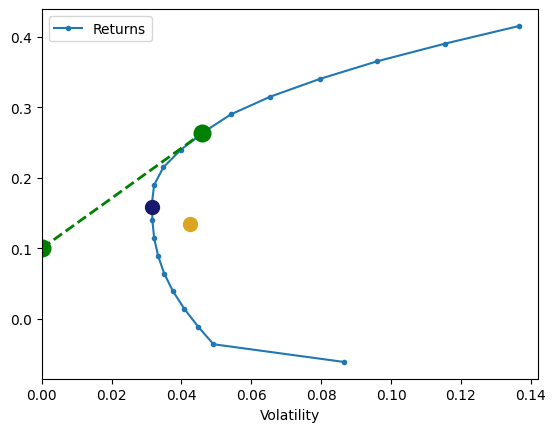

In [8]:
erk.plot_ef(20, er, cov, show_cml=True, risk_free_rate=0.1, show_ew=True, show_gmv=True)